#Ensemble Models

###1. Data Source and Contents

In [26]:
# import packages
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, roc_curve, roc_auc_score, recall_score, auc

In [27]:
# read csv
data = pd.read_csv('census_data.csv')

In [ ]:
# descriptions
data.describe 

# non-null values in each column 
data.count()

# nulls in each row 
data.isnull().sum()

# range, column, number of non-null objects of each column, datatype and memory usage 
data.info()

# show head & tail
data.tail()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


In [ ]:
# dataframe that only includes the columns that are needed
inputs = data.drop(['education_num_bin', 'workclass_bin'], axis = 'columns')

In [ ]:
# encoding inputs
le_hours_per_week_bin = LabelEncoder()
le_occupation_bin = LabelEncoder()
le_msr_bin = LabelEncoder()
le_capital_gl_bin = LabelEncoder()
le_race_sex_bin = LabelEncoder()
le_education_bin = LabelEncoder()
le_age_bin = LabelEncoder()

In [ ]:
# creating an extra column for the label encoded inputs
inputs['hours_per_week_bin_n'] = le_hours_per_week_bin.fit_transform(inputs['hours_per_week_bin'])
inputs['occupation_bin_n'] = le_occupation_bin.fit_transform(inputs['occupation_bin'])
inputs['msr_bin_n'] = le_msr_bin.fit_transform(inputs['msr_bin'])
inputs['capital_gl_bin_n'] = le_capital_gl_bin.fit_transform(inputs['capital_gl_bin'])
inputs['race_sex_bin_n'] = le_race_sex_bin.fit_transform(inputs['race_sex_bin'])
inputs['education_bin_n'] = le_education_bin.fit_transform(inputs['education_bin'])
inputs['age_bin_n'] = le_age_bin.fit_transform(inputs['age_bin'])
inputs.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_bin,age_bin,flag,y,hours_per_week_bin_n,occupation_bin_n,msr_bin_n,capital_gl_bin_n,race_sex_bin_n,education_bin_n,age_bin_n
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. Bachelors,d. 36-40 & 56-60,train,0,1,1,1,2,2,2,3
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. Bachelors,e. 40-55,train,0,0,4,2,0,2,2,4
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. Mid,d. 36-40 & 56-60,train,0,1,0,1,0,2,1,3
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. Low,e. 40-55,train,0,1,0,2,0,1,0,4
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. Bachelors,b. 26-30 & 71-100,train,0,1,4,2,0,0,2,1


In [ ]:
# create new dataframe with just the label encoded columns 
inputs = inputs.drop(['hours_per_week_bin', 'occupation_bin', 'msr_bin', 
                        'capital_gl_bin', 'race_sex_bin', 'education_bin',
                        'age_bin'], axis = 'columns')
inputs.head()

,flag,y,hours_per_week_bin_n,occupation_bin_n,msr_bin_n,capital_gl_bin_n,race_sex_bin_n,education_bin_n,age_bin_n
0,train,0,1,1,1,2,2,2,3
1,train,0,0,4,2,0,2,2,4
2,train,0,1,0,1,0,2,1,3
3,train,0,1,0,2,0,1,0,4
4,train,0,1,4,2,0,0,2,1


In [ ]:
# separate data by flag type
testdata = inputs[inputs.flag == 'test']
traindata = inputs[inputs.flag == 'train']

# separate the y values into different data frames
y_train = traindata.y
y_test = testdata.y

# drop flag and y to just have the needed data for train and test
x_train = traindata.drop(['flag', 'y'], axis = 'columns')
x_test= testdata.drop(['flag', 'y'], axis = 'columns')

print(y_test)

32561    0
32562    0
32563    1
32564    1
32565    0
        ..
48837    0
48838    0
48839    0
48840    0
48841    1
Name: y, Length: 16281, dtype: int64


###2. Finding Optimal Value of a key Hyper-Parameter

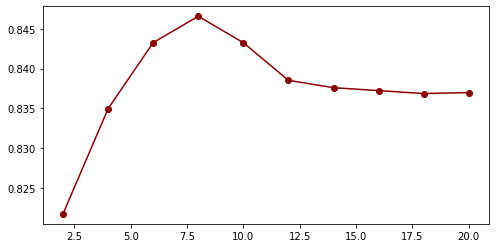

In [ ]:
DTCresults = []
max_depth_options = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

for trees in max_depth_options:
  model = DecisionTreeClassifier(max_depth = trees, random_state = 101)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  accuracy = np.mean(y_test == y_pred)
  DTCresults.append(accuracy)

plt.figure(figsize = (8,4))
pd.Series(DTCresults, max_depth_options).plot(color = 'darkred', marker = 'o')

###3.Building a Random Forest Model 

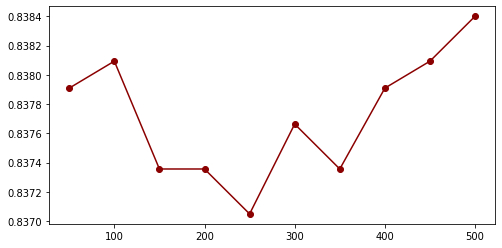

In [ ]:
RFMresults = []
n_estimators_options = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

for trees in n_estimators_options:
  model = RandomForestClassifier(n_estimators = trees, random_state = 101)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  accuracy = np.mean(y_test == y_pred)
  RFMresults.append(accuracy)

plt.figure(figsize = (8,4))
pd.Series(RFMresults, n_estimators_options).plot(color = 'darkred', marker = 'o')

###4. Building AdaBoost, Gradient Boost (classifier) and XGB Model 

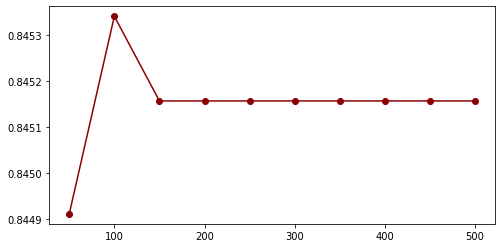

In [ ]:
# ada boost
ADAresults = []
n_estimators_options = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

for trees in n_estimators_options:
  model = AdaBoostClassifier(n_estimators = trees, random_state = 101)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  accuracy = np.mean(y_test == y_pred)
  ADAresults.append(accuracy)

plt.figure(figsize = (8,4))
pd.Series(ADAresults, n_estimators_options).plot(color = 'darkred', marker = 'o')

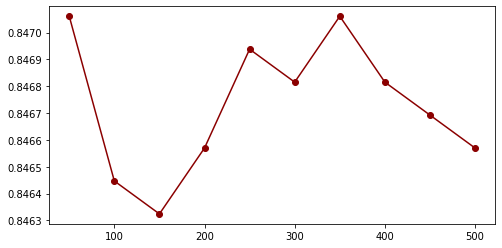

In [ ]:
# gradient boost 
GBresults = []
n_estimators_options = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

for trees in n_estimators_options:
  model = GradientBoostingClassifier(n_estimators = trees, random_state = 101)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  accuracy = np.mean(y_test == y_pred)
  GBresults.append(accuracy)

plt.figure(figsize = (8,4))
pd.Series(GBresults, n_estimators_options).plot(color = 'darkred', marker = 'o')

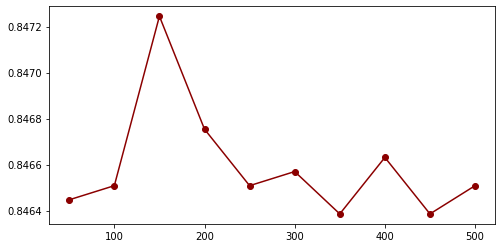

In [ ]:
# xgb model 
XGBresults = []
n_estimators_options = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

for trees in n_estimators_options:
  model = XGBClassifier(n_estimators = trees, random_state = 101)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  accuracy = np.mean(y_test == y_pred)
  XGBresults.append(accuracy)

plt.figure(figsize = (8,4))
pd.Series(XGBresults, n_estimators_options).plot(color = 'darkred', marker = 'o')

###5. Compare Performance 

In [28]:
n_estimators_options = [100]

for trees in n_estimators_options:
  # RFM
  model = RandomForestClassifier(n_estimators = trees, random_state = 101)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  rfm_accuracy = np.mean(y_test == y_pred)
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  rfm_auc = auc(fpr, tpr)
  # AdaBoost
  model = AdaBoostClassifier(n_estimators = trees, random_state = 101)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  ada_accuracy = np.mean(y_test == y_pred)
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  ada_auc = auc(fpr, tpr)
  # Gradient boost
  model = GradientBoostingClassifier(n_estimators = trees, random_state = 101)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  gb_accuracy = np.mean(y_test == y_pred)
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  gb_auc = auc(fpr, tpr)
  # XGB
  model = XGBClassifier(n_estimators = trees, random_state = 101)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  xgb_accuracy = np.mean(y_test == y_pred)
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  xgb_auc = auc(fpr, tpr)

In [30]:
data = {'Random Forest': (rfm_accuracy, rfm_auc, trees),
        'AdaBoost': (ada_accuracy, ada_auc, trees), 
        'Gradient Boost': (gb_accuracy, gb_auc, trees),
        'XGB': (xgb_accuracy, xgb_auc, trees)}
df = pd.DataFrame(data, columns = ['Random Forest', 'AdaBoost', 'Gradient Boost', 'XGB'], index = ['Accuracy', 'AUC', 'Hyperparamter'])
df

,Random Forest,AdaBoost,Gradient Boost,XGB
Accuracy,0.838093,0.845341,0.846447,0.846508
AUC,0.746653,0.746549,0.756791,0.756113
Hyperparamter,100.000000,100.000000,100.000000,100.000000
